# Milestone 2

Objectives:
• Perform further data analysis and select appropriate models for classification tasks.

Import Needed Libs

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Data From Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

data_path = "/content/drive/My Drive/DEPI/Data/Processed_Data"
print(os.listdir(data_path))

Mounted at /content/drive
['RGB', 'RGB_NIR', 'NDVI']


In [6]:
rgb_path='/content/drive/My Drive/DEPI/Data/Processed_Data/RGB'
rgb_nir_path = '/content/drive/My Drive/DEPI/Data/Processed_Data/RGB_NIR'
ndvi_path ='/content/drive/My Drive/DEPI/Data/Processed_Data/NDVI'

print("RGB shape:", os.listdir(rgb_path))
print("RGB + NIR shape:", os.listdir(rgb_nir_path))
print("NDVI shape:", os.listdir(ndvi_path))

RGB shape: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
RGB + NIR shape: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
NDVI shape: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [1]:
def count_images_in_folders(root_path):
    for main_dir in os.listdir(root_path):
        main_dir_path = os.path.join(root_path, main_dir)
        if not os.path.isdir(main_dir_path):
            continue

        print(f"\n📁 {main_dir} Folder:")
        total_images = 0

        for category in os.listdir(main_dir_path):
            category_path = os.path.join(main_dir_path, category)
            if not os.path.isdir(category_path):
                continue

            image_count = len([
                file for file in os.listdir(category_path)
            ])

            total_images += image_count
            print(f"  📂 {category}: {image_count} images")

        print(f"🔢 Total in {main_dir}: {total_images} images")


In [4]:
count_images_in_folders(data_path)


📁 RGB Folder:
  📂 AnnualCrop: 6000 images
  📂 Forest: 6000 images
  📂 HerbaceousVegetation: 6000 images
  📂 Highway: 5000 images
  📂 Industrial: 5000 images
  📂 Pasture: 4000 images
  📂 PermanentCrop: 5000 images
  📂 Residential: 6000 images
  📂 River: 4723 images
  📂 SeaLake: 6000 images
🔢 Total in RGB: 53723 images

📁 RGB_NIR Folder:
  📂 AnnualCrop: 3000 images
  📂 Forest: 3000 images
  📂 HerbaceousVegetation: 3000 images
  📂 Highway: 2500 images
  📂 Industrial: 2500 images
  📂 Pasture: 2000 images
  📂 PermanentCrop: 2500 images
  📂 Residential: 3000 images
  📂 River: 2361 images
  📂 SeaLake: 3000 images
🔢 Total in RGB_NIR: 26861 images

📁 NDVI Folder:
  📂 AnnualCrop: 3000 images
  📂 Forest: 3000 images
  📂 HerbaceousVegetation: 3000 images
  📂 Highway: 2500 images
  📂 Industrial: 2500 images
  📂 Pasture: 2000 images
  📂 PermanentCrop: 2500 images
  📂 Residential: 3000 images
  📂 River: 2361 images
  📂 SeaLake: 3000 images
🔢 Total in NDVI: 26861 images


## 1. Advanced Data Analysis:

### Analyze the relationship between different spectral bands and land types to determine which bands are most useful for classification.

In [ ]:
# Done before at milestone 1 while doing the plots of different bands

### Use dimensionality reduction techniques (e.g., PCA – Principal Component Analysis) to reduce the number of features while preserving important information in the satellite images.

In [ ]:
# We used EUROSAT Images that are already label with samll size, so no need for PCA

## 2. Model Selection:

### Choose suitable machine learning models for image classification, particularly DNNs (Deep Neural Networks).

In [ ]:
# We Will use CNN Model

### Start with a simple CNN (Convolutional Neural Network) model and experiment with more advanced architectures such as ResNet, VGG, or U-Net if working with pixel-wise classification.

###  Explore transfer learning techniques by using pre-trained models on similar datasets (e.g., ImageNet or EuroSat) and fine-tune them for land type classification.

## 3. Data Visualization:

### isualize the correlation between the spectral bands and the land types.

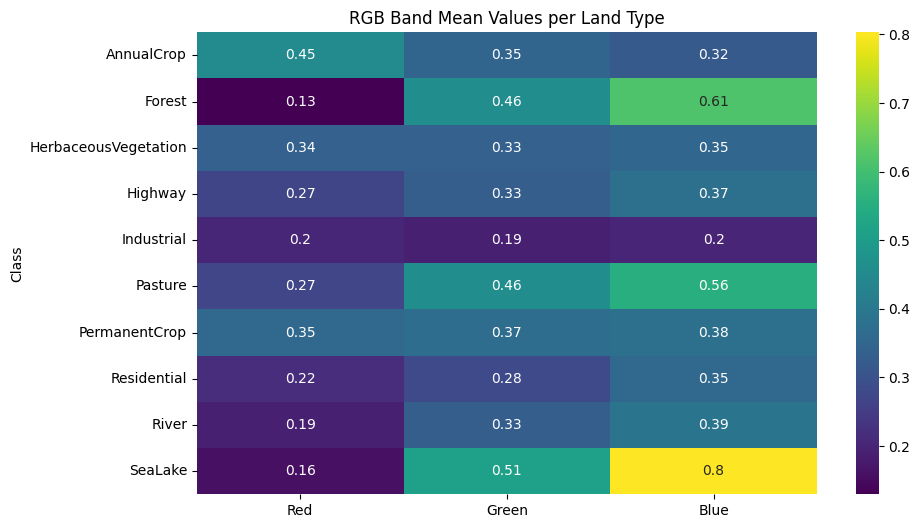

In [9]:
def visualize_rgb_correlation(base_dir=rgb_path, n_samples=10):
    bands = ['Red', 'Green', 'Blue']
    land_types = sorted(os.listdir(base_dir))
    data = []

    for land_type in land_types:
        class_path = os.path.join(base_dir, land_type)
        files = [f for f in os.listdir(class_path) if f.endswith('.npy')][:n_samples]

        for file in files:
            img = np.load(os.path.join(class_path, file))
            means = img.mean(axis=(0, 1))
            data.append(dict(zip(bands, means)) | {'Class': land_type})

    df = pd.DataFrame(data)
    df_grouped = df.groupby("Class").mean()

    plt.figure(figsize=(10, 6))
    sns.heatmap(df_grouped, annot=True, cmap='viridis')
    plt.title("RGB Band Mean Values per Land Type")
    plt.show()
visualize_rgb_correlation()

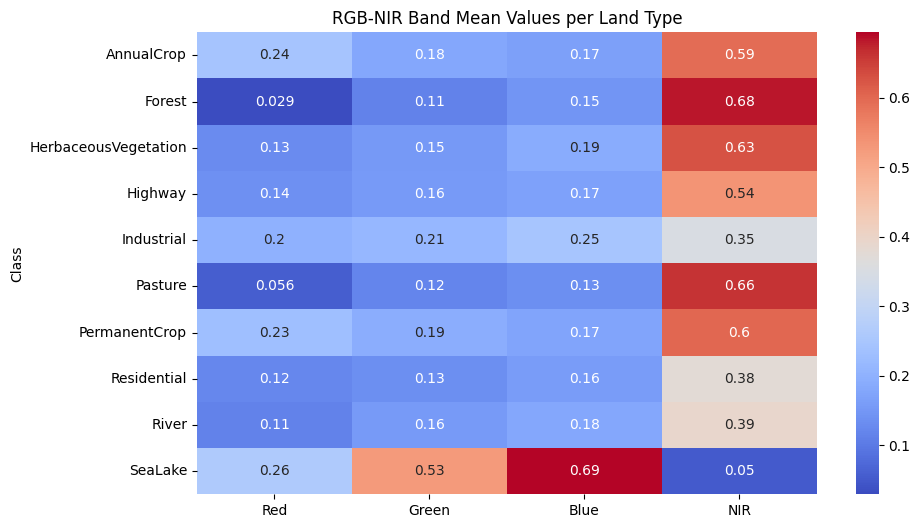

In [10]:
def visualize_rgb_nir_correlation(base_dir=rgb_nir_path, n_samples=10):
    bands = ['Red', 'Green', 'Blue', 'NIR']
    land_types = sorted(os.listdir(base_dir))
    data = []

    for land_type in land_types:
        class_path = os.path.join(base_dir, land_type)
        files = [f for f in os.listdir(class_path) if f.endswith('.npy')][:n_samples]

        for file in files:
            img = np.load(os.path.join(class_path, file))
            means = img.mean(axis=(0, 1))
            data.append(dict(zip(bands, means)) | {'Class': land_type})

    df = pd.DataFrame(data)
    df_grouped = df.groupby("Class").mean()

    plt.figure(figsize=(10, 6))
    sns.heatmap(df_grouped, annot=True, cmap='coolwarm')
    plt.title("RGB-NIR Band Mean Values per Land Type")
    plt.show()
visualize_rgb_nir_correlation()

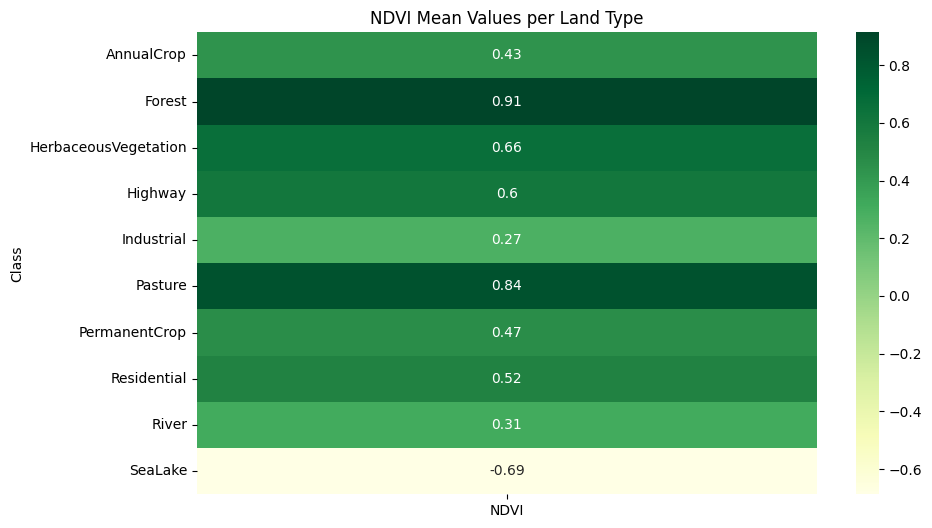

In [11]:
def visualize_ndvi_correlation(base_dir=ndvi_path, n_samples=10):
    land_types = sorted(os.listdir(base_dir))
    data = []

    for land_type in land_types:
        class_path = os.path.join(base_dir, land_type)
        files = [f for f in os.listdir(class_path) if f.endswith('.npy')][:n_samples]

        for file in files:
            img = np.load(os.path.join(class_path, file))
            if img.ndim == 3:
                img = img.squeeze()
            mean_ndvi = img.mean()
            data.append({'NDVI': mean_ndvi, 'Class': land_type})

    df = pd.DataFrame(data)
    df_grouped = df.groupby("Class").mean()

    plt.figure(figsize=(10, 6))
    sns.heatmap(df_grouped, annot=True, cmap='YlGn')
    plt.title("NDVI Mean Values per Land Type")
    plt.show()
visualize_ndvi_correlation()

### Develop visualizations such as confusion matrices, precision-recall curves, and ROC curves to help assess the initial model performance.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# data_path = "/content/drive/My Drive/EuroSAT_Final_Dataset/"
# X = np.load(data_path + "X.npy")
# y = np.load(data_path + "y.npy")
# NDVI = np.load(data_path + "NDVI.npy")
# y = np.load(data_path + "y.npy", mmap_mode='r')
# NDVI = np.load(data_path + "NDVI.npy", mmap_mode='r')

# print("y shape:", y.shape)
# print("NDVI shape:", NDVI.shape)

Mounted at /content/drive
X shape: (40000, 64, 64, 4)
y shape: (40000,)
NDVI shape: (40000, 64, 64)


## 1️⃣ Dataset Summary & Composition

✔ Total images count and distribution by land type (Agriculture, Water, Urban, etc.).


In [ ]:
label_mapping = {
    0: 'AnnualCrop',
    1: 'Forest',
    2: 'HerbaceousVegetation',
    3: 'Highway',
    4: 'Industrial',
    5: 'Pasture',
    6: 'PermanentCrop',
    7: 'Residential',
    8: 'River',
    9: 'SeaLake'
}

y_named = np.vectorize(label_mapping.get)(y)

Total Images: 40000


<ipython-input-4-cec5519f5717>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Land_Type'], palette="viridis")


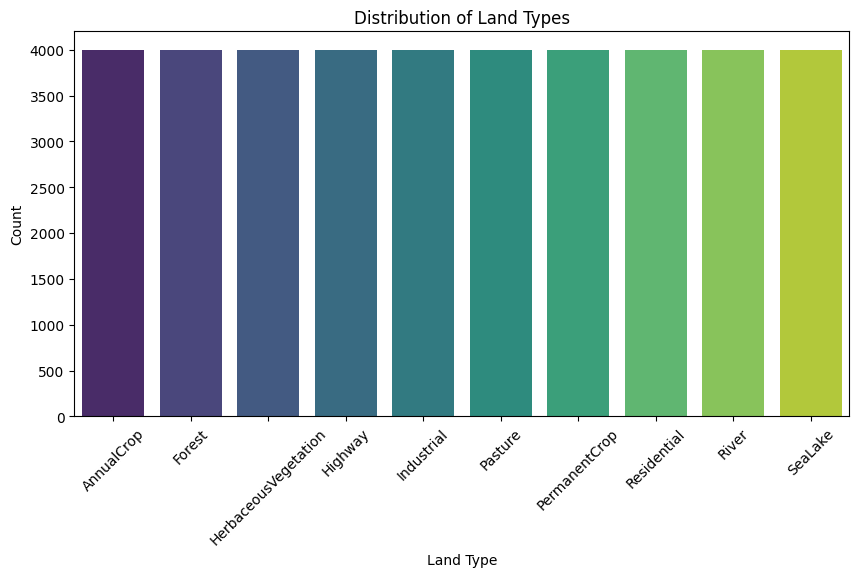

In [ ]:
df = pd.DataFrame(y_named, columns=['Land_Type'])

total_images = len(y)
print(f"Total Images: {total_images}")

# ✔ Distribution of land types
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Land_Type'], palette="viridis")
plt.title("Distribution of Land Types")
plt.xlabel("Land Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


  ✔ Check for missing values or mislabeled images.

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values Per Column:\n", missing_values)

Missing Values Per Column:
 Land_Type    0
dtype: int64


  ✔ Ensure balanced class distribution to avoid bias in training

In [ ]:
unique_labels = df['Land_Type'].unique()
print(f"Unique Land Types in Dataset: {unique_labels}")

Unique Land Types in Dataset: ['AnnualCrop' 'Forest' 'HerbaceousVegetation' 'Highway' 'Industrial'
 'Pasture' 'PermanentCrop' 'Residential' 'River' 'SeaLake']


 ✔ Histogram for pixel intensity in each spectral band (Red, Green, Blue, NIR).

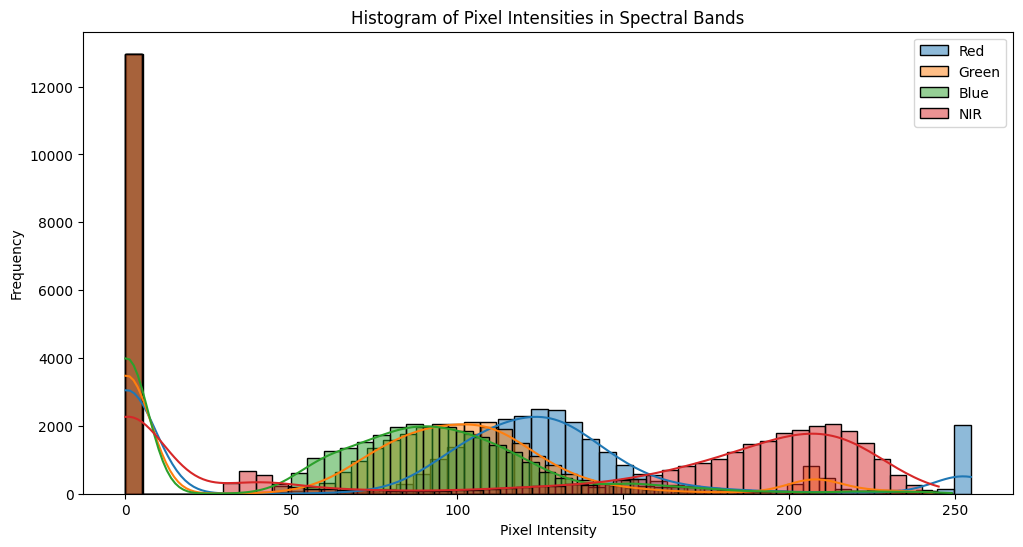

In [ ]:
bands = ["Red", "Green", "Blue", "NIR"]
num_samples, height, width, num_bands = X.shape

X_reshaped = X.reshape(num_samples, -1, num_bands).mean(axis=1)
df_bands = pd.DataFrame(X_reshaped, columns=bands)

plt.figure(figsize=(12, 6))
for band in bands:
    sns.histplot(df_bands[band], kde=True, bins=50, label=band)
plt.legend()
plt.title("Histogram of Pixel Intensities in Spectral Bands")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

✔ Correlation matrix between spectral bands to find relationships.

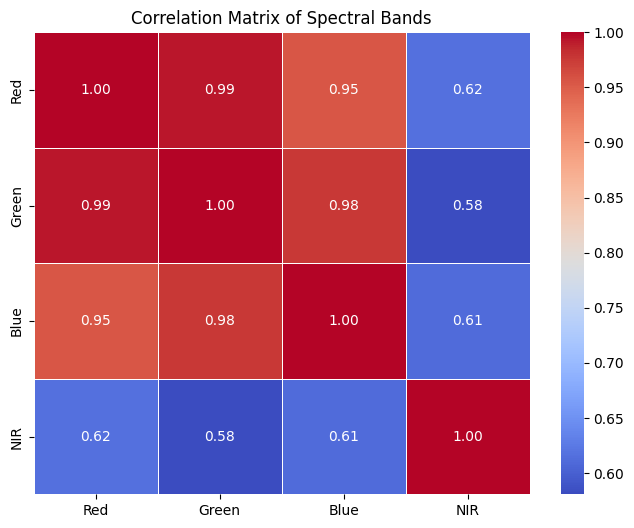

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_bands.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Spectral Bands")
plt.show()

✔ Boxplots for NDVI (Normalized Difference Vegetation Index) to differentiate vegetation types.


<ipython-input-9-40279128082c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Land Type", y="NDVI Mean", data=ndvi_df, palette="viridis")


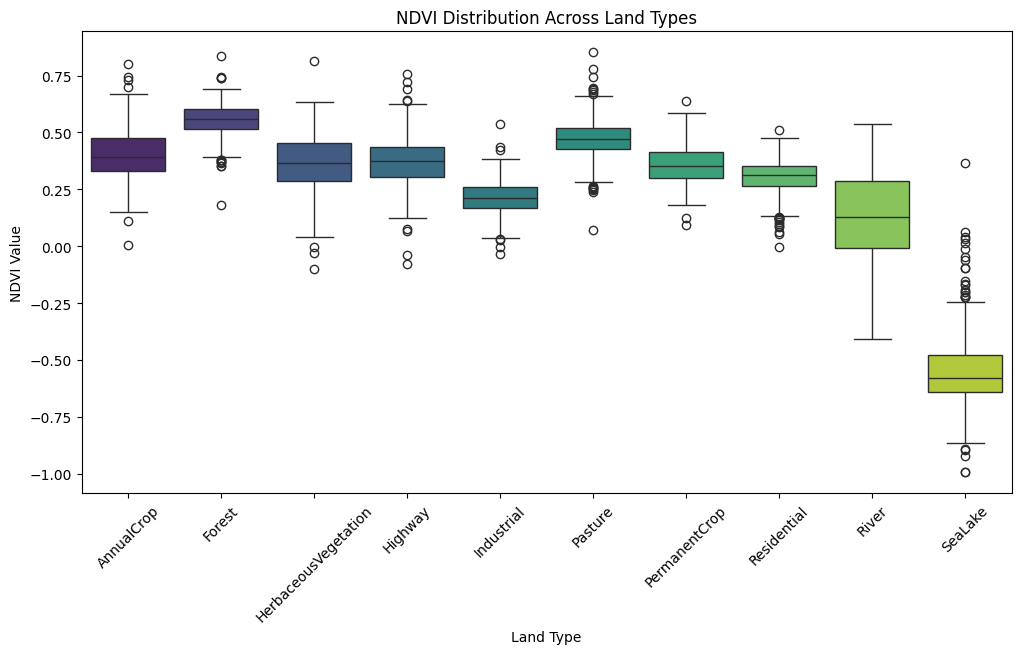

In [ ]:
samples_per_class =500
selected_indices = []

for land_type in np.unique(y_named):
    indices = np.where(y_named == land_type)[0]
    selected_indices.extend(np.random.choice(indices, min(len(indices), samples_per_class), replace=False))

NDVI_selected = NDVI[selected_indices]

ndvi_df = pd.DataFrame({
    "NDVI Mean": NDVI_selected.mean(axis=(1, 2)),
    "Land Type": y_named[selected_indices]
})

plt.figure(figsize=(12, 6))
sns.boxplot(x="Land Type", y="NDVI Mean", data=ndvi_df, palette="viridis")
plt.title("NDVI Distribution Across Land Types")
plt.xlabel("Land Type")
plt.ylabel("NDVI Value")
plt.xticks(rotation=45)
plt.show()

## 3️⃣ Image Quality & Preprocessing Checks
✔ Check resolution variations (Are images consistent in size?).



In [ ]:
image_shapes = [img.shape for img in X]
unique_shapes = set(image_shapes)
print(f"Unique image resolutions in dataset: {unique_shapes}")

Unique image resolutions in dataset: {(64, 64, 4)}


✔ Apply PCA (Principal Component Analysis) to analyze redundancy in spectral bands.


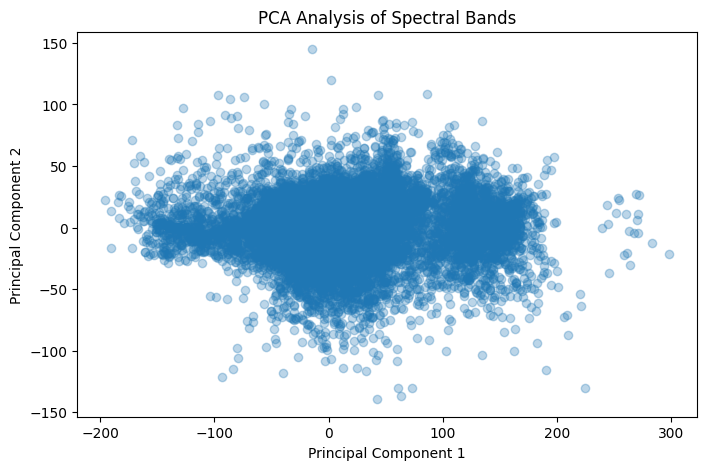

In [ ]:
batch_size=1000
num_batches = num_samples // batch_size + 1  # Calculate number of batches
pca = PCA(n_components=2)
X_pca_batches = []

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, num_samples)

    if start_idx >= num_samples:
        break  # Avoid indexing error

    X_batch = X[start_idx:end_idx].reshape(end_idx - start_idx, -1, num_bands).mean(axis=1)  # Reduce spatial dimension
    X_pca_batches.append(pca.fit_transform(X_batch))  # Apply PCA

X_pca = np.vstack(X_pca_batches)  # Combine batches

# PCA Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Analysis of Spectral Bands")
plt.show()


✔ Visualize sample images from different land types to understand spectral signatures.

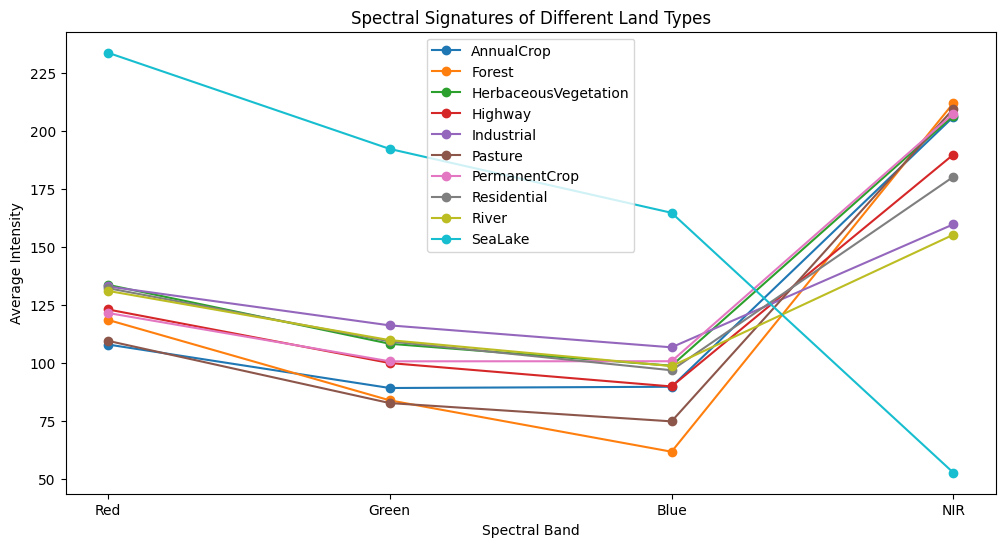

In [ ]:
num_samples=1000
unique_labels = df['Land_Type'].unique()
sample_images = {}

for land_type in unique_labels:
    indices = df[df['Land_Type'] == land_type].index[:num_samples]
    sample_images[land_type] = X[indices]

plt.figure(figsize=(12, 6))
for land_type, images in sample_images.items():
    avg_spectral = images.mean(axis=(0, 1, 2))
    plt.plot(bands, avg_spectral, marker="o", label=land_type)

plt.xlabel("Spectral Band")
plt.ylabel("Average Intensity")
plt.title("Spectral Signatures of Different Land Types")
plt.legend()
plt.show()

In [ ]:
print(f"Min pixel value: {X.min()}, Max pixel value: {X.max()}")


Min pixel value: 0.0, Max pixel value: 255.0


Visualize sample images from different land types (With NIR)

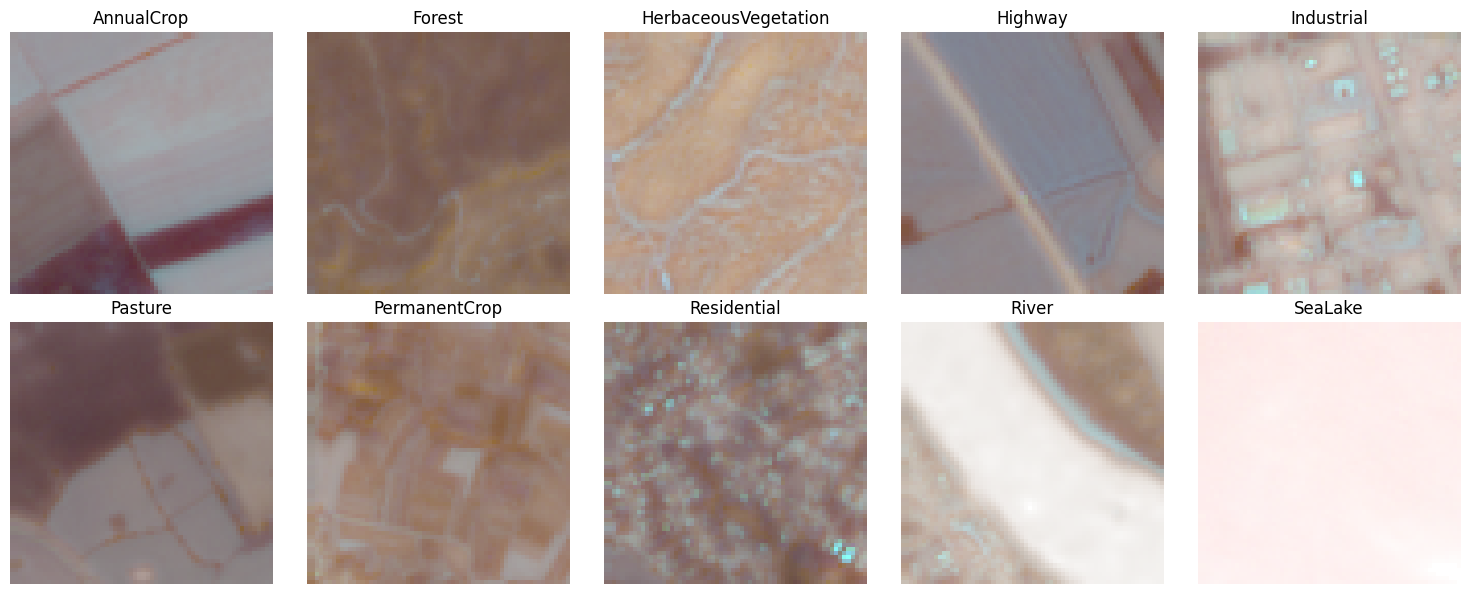

In [ ]:
unique_labels = df['Land_Type'].unique()
num_classes = len(unique_labels)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.flatten()

for i, land_type in enumerate(unique_labels[:10]):
    idx = np.where(df['Land_Type'] == land_type)[0][0]
    image = X[idx]

    axes[i].imshow(image.astype(np.uint8))
    axes[i].set_title(land_type)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


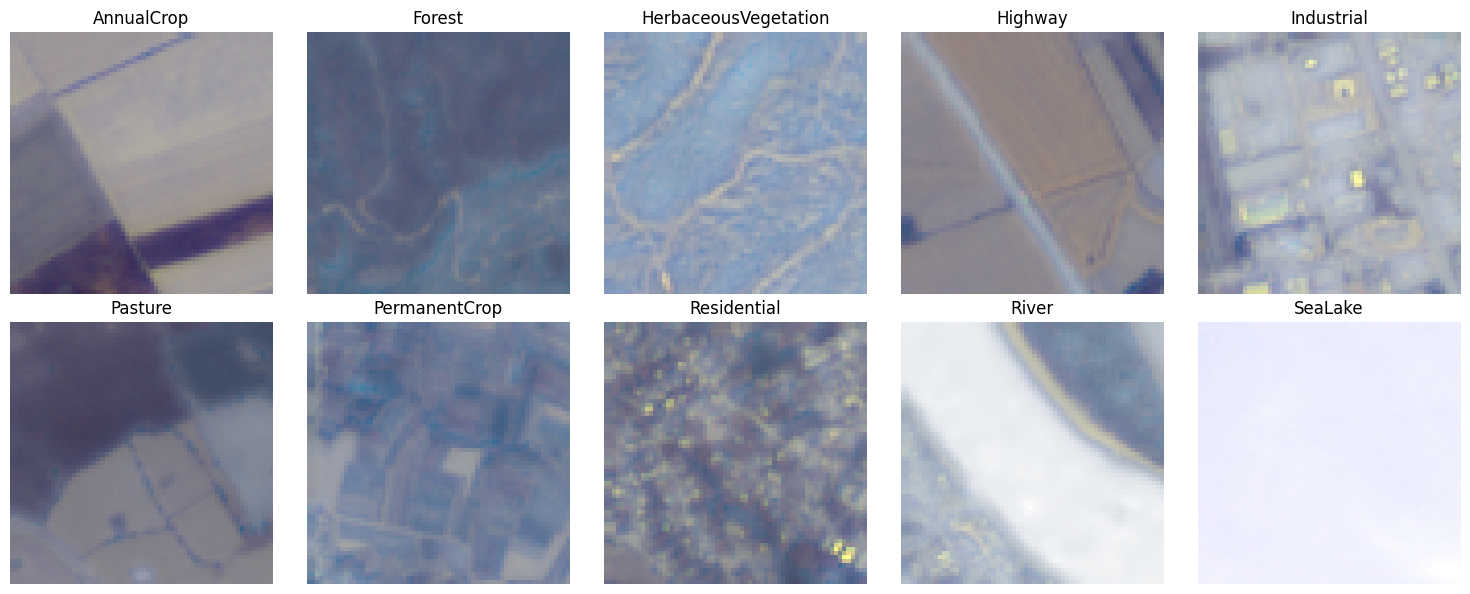

In [ ]:
unique_labels = df['Land_Type'].unique()
num_classes = len(unique_labels)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.flatten()

for i, land_type in enumerate(unique_labels[:10]):
    idx = np.where(df['Land_Type'] == land_type)[0][0]
    image = X[idx]
    image = image[:, :,  [2, 1, 0, 3]]  # Convert from BGR to RGB (if needed)     <-------------- this is the code that solved the issue of Unarranged Bands.

    axes[i].imshow(image.astype(np.uint8))
    axes[i].set_title(land_type)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Visualize sample images from different land types (Without NIR)


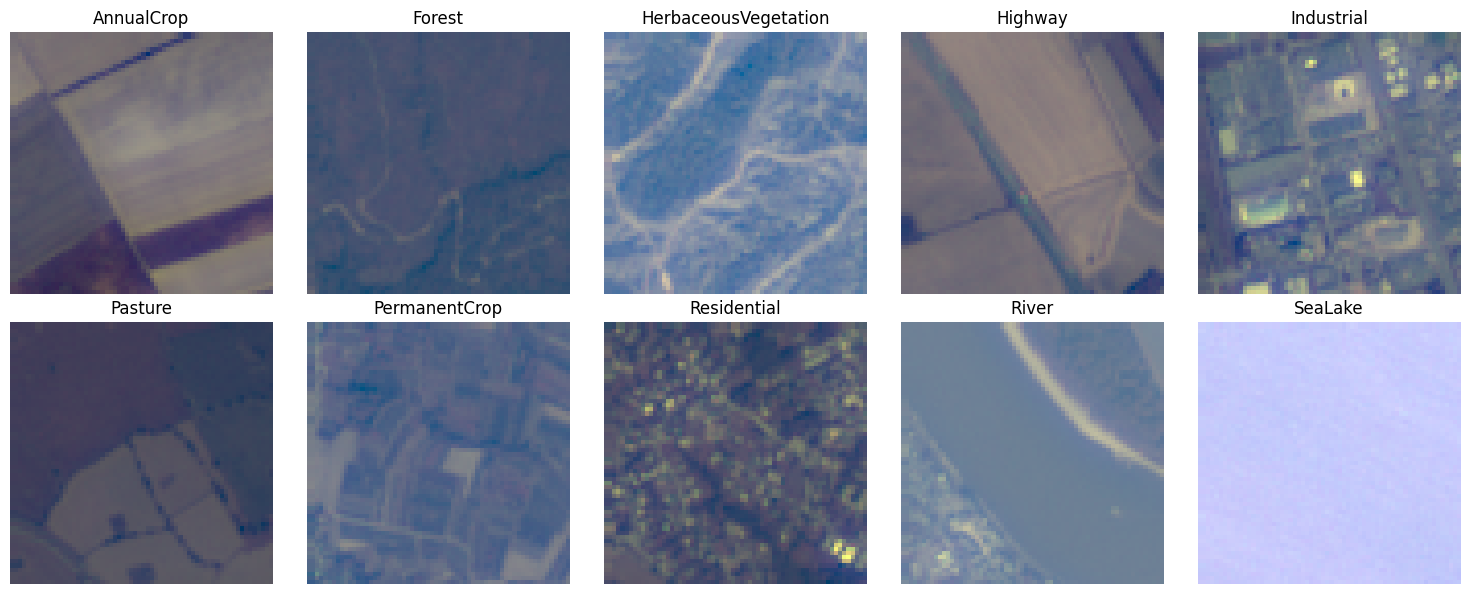

In [ ]:
unique_labels = df['Land_Type'].unique()
num_classes = len(unique_labels)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.flatten()

for i, land_type in enumerate(unique_labels[:10]):
    idx = np.where(df['Land_Type'] == land_type)[0][0]
    image = X[idx, :, :, :4]
    image = image[:, :,  [2, 1, 0]]
    axes[i].imshow(image.astype(np.uint8))
    axes[i].set_title(land_type)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# Selecting the suitable model for the training